# Part 2: The Wine Dataset

The Wine dataset is a commonly used dataset in machine learning and data analysis, primarily for classification tasks. It represents the results of a chemical analysis of wines originating from three different grape varieties (classes). Each class corresponds to a different type of wine. The dataset contains a set of features derived from this chemical analysis.

- Number of Classes: 3 (representing three different types of wines)
- Number of Samples: 178
- Number of Features: 13 (chemical attributes)

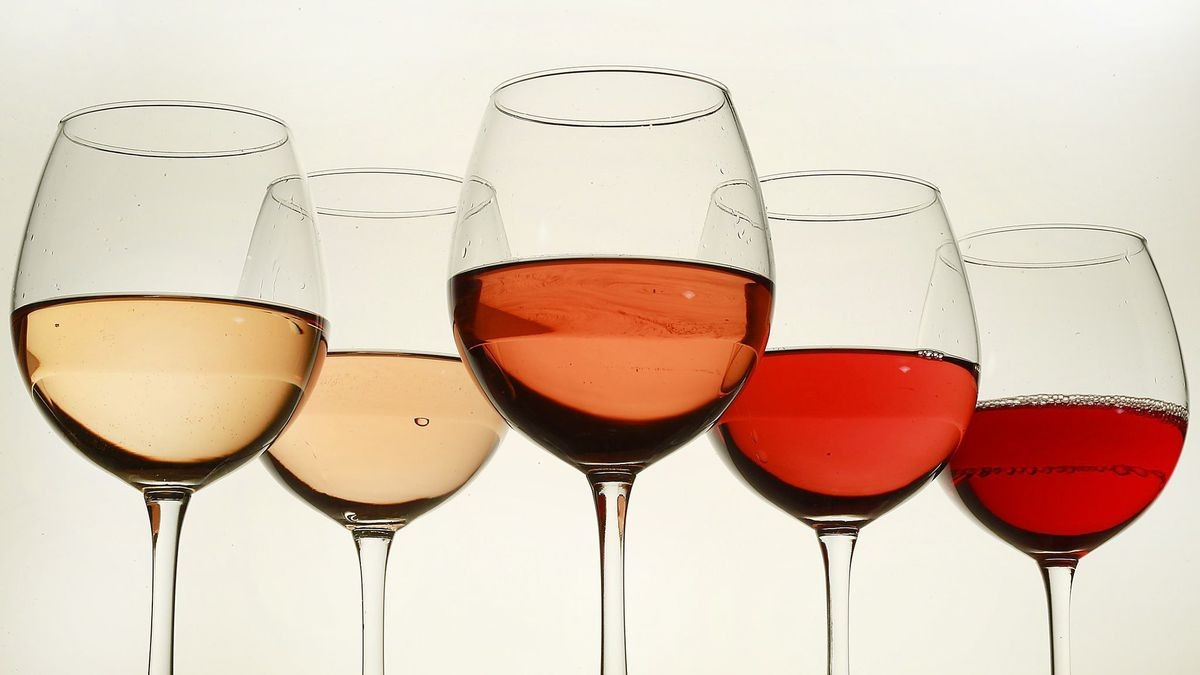

Let's now repeat the process with this new dataset.

In [2]:
from sklearn import datasets
import pandas as pd

# Load the Wine dataset
wine = datasets.load_wine()

# Extract the features (X) and target labels (y)
X = wine.data
y = wine.target

wine_df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
wine_df['target'] = wine.target

In [3]:
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


The plots we did before can be easily done using **seaborn**, a fantastic visualization library. Investigate how we can use the `pairplot` [function](https://seaborn.pydata.org/generated/seaborn.pairplot.html) to create a plot using the dataframe we just created.

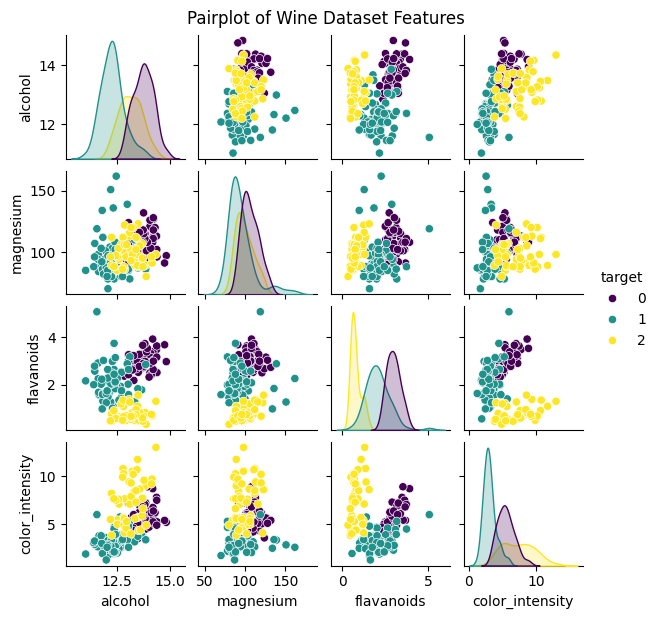

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(wine_df, hue='target',
             palette='viridis',
             diag_kind='kde',
             x_vars=['alcohol', 'magnesium', 'flavanoids', 'color_intensity'],
             y_vars=['alcohol', 'magnesium', 'flavanoids', 'color_intensity'],
             height=1.5
             )
plt.suptitle('Pairplot of Wine Dataset Features', y=1.02)
plt.show()

In [6]:
from sklearn import datasets
# Load the Wine dataset
wine = datasets.load_wine()
X = wine.data
y = wine.target


In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [24]:
## use a random forest classifier to identify the wines
from sklearn.ensemble import RandomForestClassifier

## Get the accuracy of your model
from sklearn.metrics import accuracy_score

clF1 = RandomForestClassifier() # Crear l'instancia de classificador
clF1.fit(X_train, y_train) # entrenament ("forward + backward N vegades")

y_pred = clF1.predict(X_test) # forward o utilitzar el model

acc = accuracy_score(y_test, y_pred)

print(acc)

0.9814814814814815


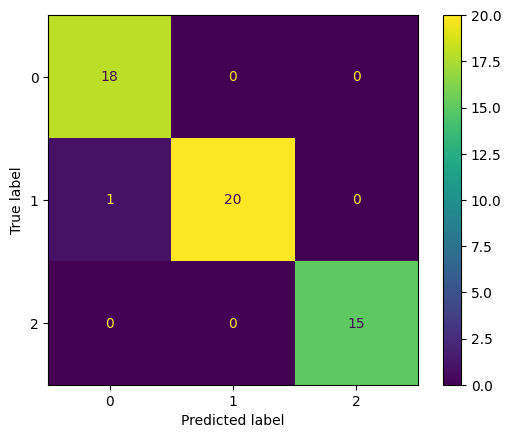

In [27]:
## Display the confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

Great! Now that we trained the model, let's see if training a model with less features afects the model. We will use the following function: [SelectKBest](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html). It has to be used as any other sklearn model. You can use the functions `.fit` and `.transform` to train and transform data.




In [52]:
## Use Select KBest to select N amount of features.
## test this features using the same classifier you used
from sklearn.feature_selection import SelectKBest

reductor_dim = SelectKBest(k=3)
reductor_dim.fit(X_train, y_train)

X_train_5dim = reductor_dim.transform(X_train)
X_test_5dim = reductor_dim.transform(X_test)

print(reductor_dim.get_feature_names_out())

['x6' 'x11' 'x12']


In [53]:
clF2 = RandomForestClassifier()
clF2.fit(X_train_5dim, y_train)

y_pred_5d = clF2.predict(X_test_5dim)
print(accuracy_score(y_pred_5d, y_test))

0.9074074074074074


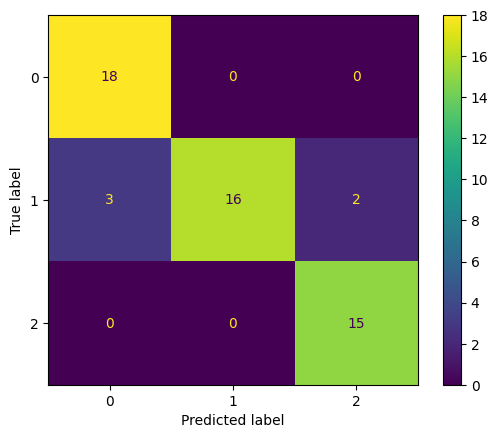

In [54]:
## Display the confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_5d)

In [55]:
import numpy as np

# Get a boolean mask of selected features
selected_feature_mask = reductor_dim.get_support()

# Get the names of the selected features
selected_feature_names = np.array(wine.feature_names)[selected_feature_mask]

print(selected_feature_names)

['flavanoids' 'od280/od315_of_diluted_wines' 'proline']


Let's train a classifier with the selected features

In [56]:
# Train classifier with selected features



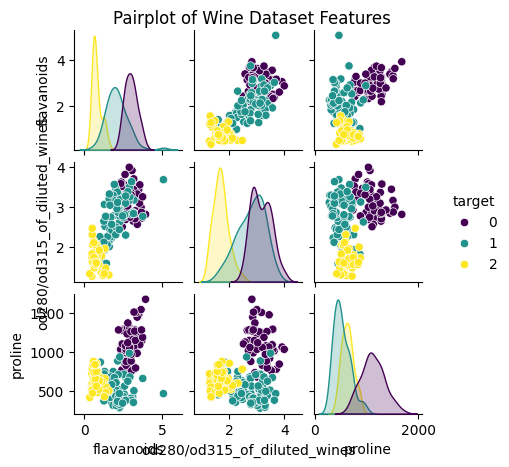

In [57]:
## Let's visualize these features
sns.pairplot(wine_df, hue='target',
             palette='viridis',
             diag_kind='kde',
             x_vars=selected_feature_names,
             y_vars=selected_feature_names,
             height=1.5
             )
plt.suptitle('Pairplot of Wine Dataset Features', y=1.02)
plt.show()


In [73]:
whites = wine_df[wine_df["target"]==0]
pinks = wine_df[wine_df["target"]==1]
reds = wine_df[wine_df["target"]==2]

feature1 = "alcohol"
feature2 = "hue"
feature3 = "color_intensity"

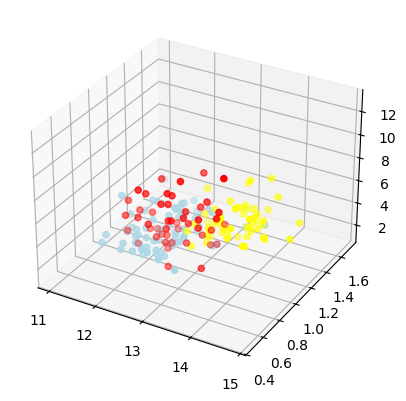

In [74]:


fig = plt.figure()
ax = fig.add_subplot(projection='3d')


ax.scatter(whites[feature1],whites[feature2],whites[feature3] , label="white", facecolor="yellow")
ax.scatter(pinks[feature1],pinks[feature2],pinks[feature3] , label="white", facecolor="lightblue")
ax.scatter(reds[feature1],reds[feature2],reds[feature3] , label="white", facecolor="red")


plt.show()
